In [1]:
%matplotlib inline
from IPython.display import Image, display
import numpy as np
import tensorflow as tf
import vgg19

from images import load_image, add_one_dim, image_big

In [2]:
model_file_path = "vgg19/vgg19.mat"
net = vgg19.VGG19(model_file_path)

In [3]:
content_filename = 'data/content/dolphins.jpg'
content_image = load_image(content_filename, max_size=512)
shape = [content_image.shape[1], content_image.shape[0]]
content_image = add_one_dim(content_image)

style_filename = 'data/styles/random-art.jpg'
style_image = load_image(style_filename, shape=shape)
style_image = add_one_dim(style_image)

In [4]:
content_layers = ['conv4_2']
style_layers = ['relu1_1', 'relu2_1', 'relu3_1', 'relu4_1', 'relu5_1']

In [5]:
iterations = 10
content_layer_weights = [1.0]
style_layer_weights = [0.2, 0.2, 0.2, 0.2, 0.2]
clw = 5e0
slw = 1e4
tvlw = 1e-3

In [6]:
sess = tf.Session(config=tf.ConfigProto(allow_soft_placement=True))

In [7]:
from style_transfer import StyleTransfer
import optimizers

st = StyleTransfer(
    sess,
    net,
    iterations,
    content_layers,
    style_layers,
    content_image,
    style_image,
    content_layer_weights,
    style_layer_weights,
    clw,
    slw,
    tvlw,
    optimizers.ADAM,
    learning_rate=5,
    plot=True,
    init_img_type="content"
)

Iteration: 0|loss 1166337695023104.0|0.0|116633772032.0|1971123.0


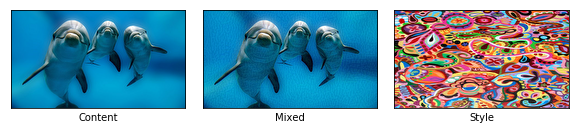

Iteration: 1|loss 1162346194010112.0|236985264.0|116234493952.0|3797299.0
Iteration: 2|loss 1022095916007424.0|481233344.0|102209347584.0|5350263.0
Iteration: 3|loss 873136450961408.0|789897600.0|87313252352.0|6806245.0
Iteration: 4|loss 749251743186944.0|1135609216.0|74924605440.0|8209929.0
Iteration: 5|loss 655284636745728.0|1476203648.0|65527726080.0|9541070.0
Iteration: 6|loss 579360285261824.0|1750594560.0|57935155200.0|10736386.0
Iteration: 7|loss 508472319803392.0|1935173760.0|50846265344.0|11781721.0
Iteration: 8|loss 442684929998848.0|2056526592.0|44267466752.0|12714574.0
Iteration: 9|loss 386138430767104.0|2150767616.0|38612770816.0|13569910.0


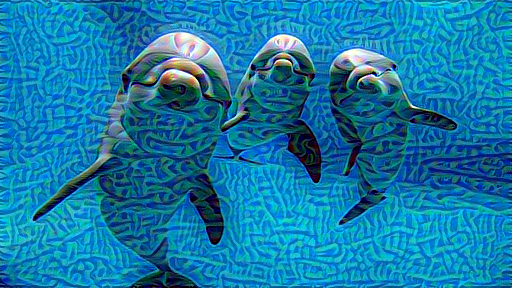

In [8]:
im = st.run()
image_big(im)

In [9]:
s = st.loss_summary()
print(s)

{'loss': [1166337700000000.0, 1162346200000000.0, 1022095900000000.0, 873136450000000.0, 749251740000000.0, 655284640000000.0, 579360300000000.0, 508472320000000.0, 442684930000000.0, 386138430000000.0], 'content_loss': [0.0, 236985260.0, 481233340.0, 789897600.0, 1135609200.0, 1476203600.0, 1750594600.0, 1935173800.0, 2056526600.0, 2150767600.0], 'style_loss': [116633770000.0, 116234490000.0, 102209350000.0, 87313250000.0, 74924605000.0, 65527726000.0, 57935155000.0, 50846265000.0, 44267467000.0, 38612770000.0], 'tv_loss': [1971123.0, 3797299.0, 5350263.0, 6806245.0, 8209929.0, 9541070.0, 10736386.0, 11781721.0, 12714574.0, 13569910.0]}


In [10]:
from visualizations import visualize_loss, visualize_losses

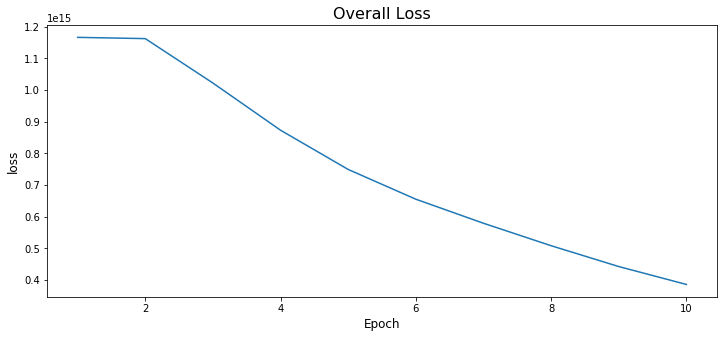

In [11]:
visualize_loss(s["loss"], "loss", "Overall Loss")

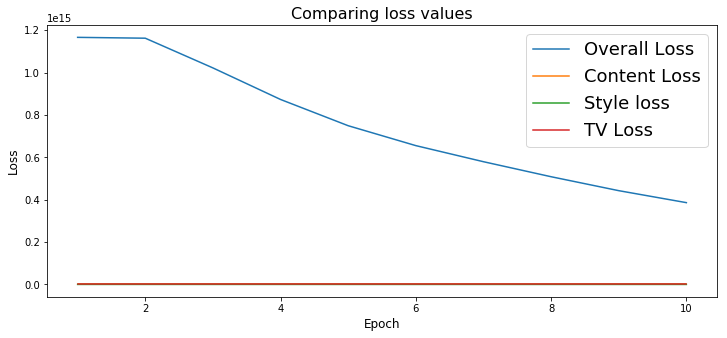

In [12]:
losses = [s["loss"], s["content_loss"], s["style_loss"], s["tv_loss"]]
labels = ["Overall Loss", "Content Loss", "Style loss", "TV Loss"]
title = "Comparing loss values"

visualize_losses(losses, labels, title)